In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

import sys
sys.path.append('/nfs/home/users/krakovic/sharedscratch/HPL-LATTICeA/libraries/')
from data_processing import read_csvs_forcefold

In [2]:
adatas_path        = '/nfs/home/users/krakovic/sharedscratch/Histomorphological-Phenotype-Learning/results/BarlowTwins_3/LATTICeA_5x/h224_w224_n3_zdim128_filtered/rapids_2p5m/adatas/'
groupby            = 'leiden_2.5'
h5_complete_path   = '/nfs/home/users/krakovic/sharedscratch/Histomorphological-Phenotype-Learning/results/BarlowTwins_3/LATTICeA_5x/h224_w224_n3_zdim128_filtered/hdf5_LATTICeA_5x_he_complete_filtered.h5'
h5_additional_path = '/nfs/home/users/krakovic/sharedscratch/Histomorphological-Phenotype-Learning/results/BarlowTwins_3/LATTICeA_5x/h224_w224_n3_zdim128_filtered/hdf5_TCGA_LUAD_5x_he_train_filtered_overall_survival.h5'
force_fold         = 2

In [ ]:
complete_df, additional_df, leiden_clusters = read_csvs_forcefold(adatas_path, groupby, h5_complete_path, h5_additional_path, force_fold)

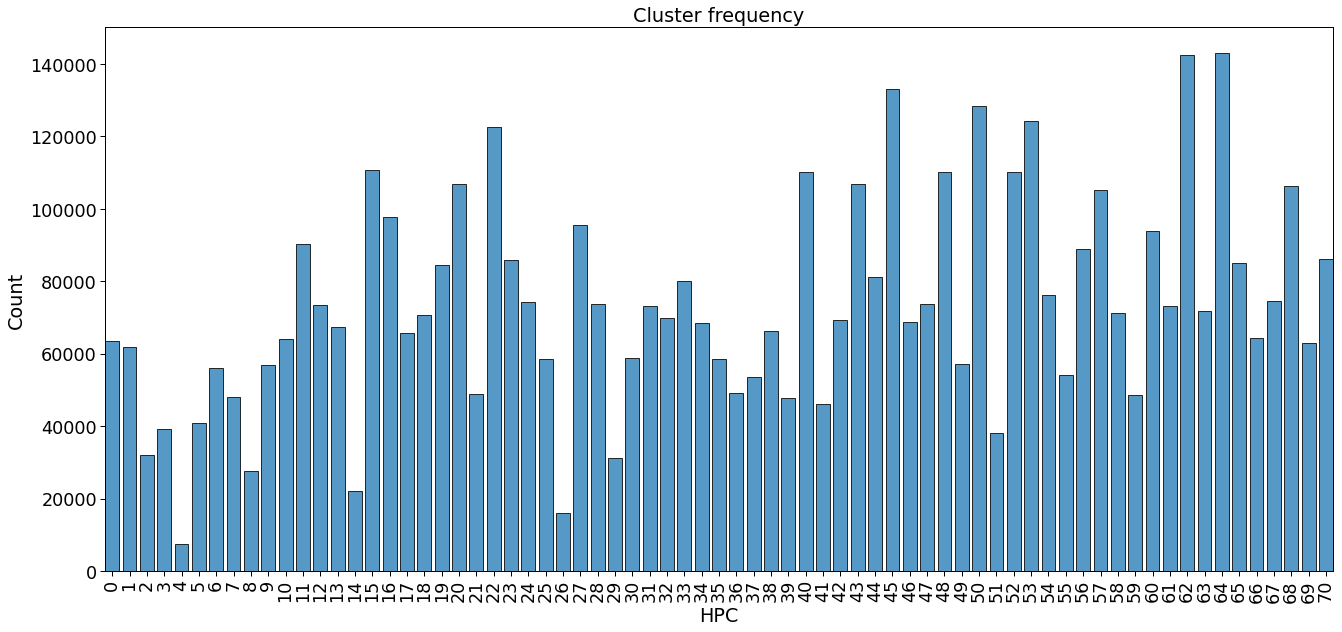

In [66]:
sns.set_context("paper", font_scale=2.0)
fig, ax = plt.subplots(figsize=(22,10))

sns.histplot(complete_df, x=groupby, stat='count', common_norm=False, discrete=True, shrink=.8, ax=ax)
ax.set_ylabel('Count')
ax.set_xlabel('HPC')
ax.set_xticks(list(range(71)), labels=list(range(71)), rotation=90)
ax.set_title('Cluster frequency')
ax.margins(x=0)

In [67]:
train_df = complete_df[complete_df['original_set'] == 'train']

### Max Patient (LATTICeA - complete)

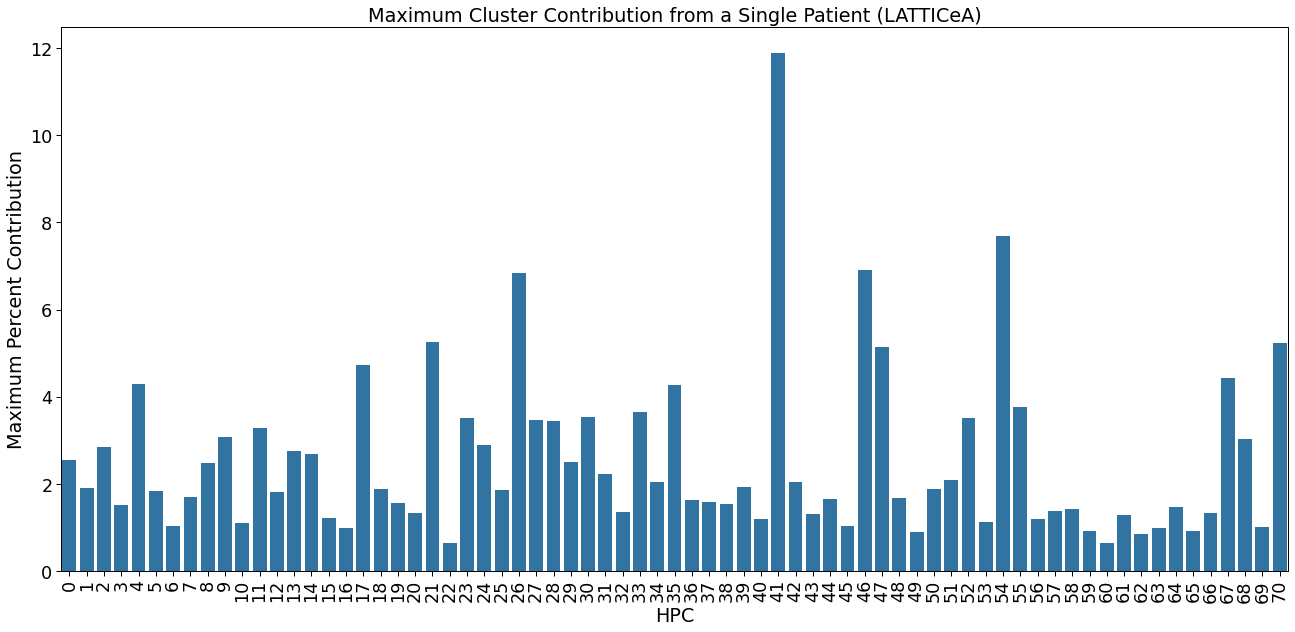

In [74]:
patient_contributions = list()

for cluster in complete_df[groupby].dropna().unique():
    cluster_subset = complete_df[complete_df[groupby] == cluster]
    cluster_size = len(cluster_subset)
    patients, counts = np.unique(cluster_subset['samples'].values, return_counts=True)
    counts_props = counts / cluster_size
    max_idx = np.argmax(counts_props)
    max_val = counts_props[max_idx]
    patient_contributions.append((int(cluster), max_val * 100))

max_patient_df = pd.DataFrame(patient_contributions, columns=['Cluster', 'max_perc'])
max_patient_df = max_patient_df.sort_values(by='Cluster')


fig, ax = plt.subplots(figsize=(22,10))

sns.barplot(max_patient_df, x = 'Cluster', y = 'max_perc', ax=ax)
ax.set_ylabel('Maximum Percent Contribution')
ax.set_xlabel('HPC')
ax.set_title('Maximum Cluster Contribution from a Single Patient (LATTICeA)')
ax.set_xticks(list(range(71)), labels=list(range(71)), rotation=90)
plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/cluster_qc_frequency/max_single_patient_perc_complete_df.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Max Patient (LATTICeA - train)

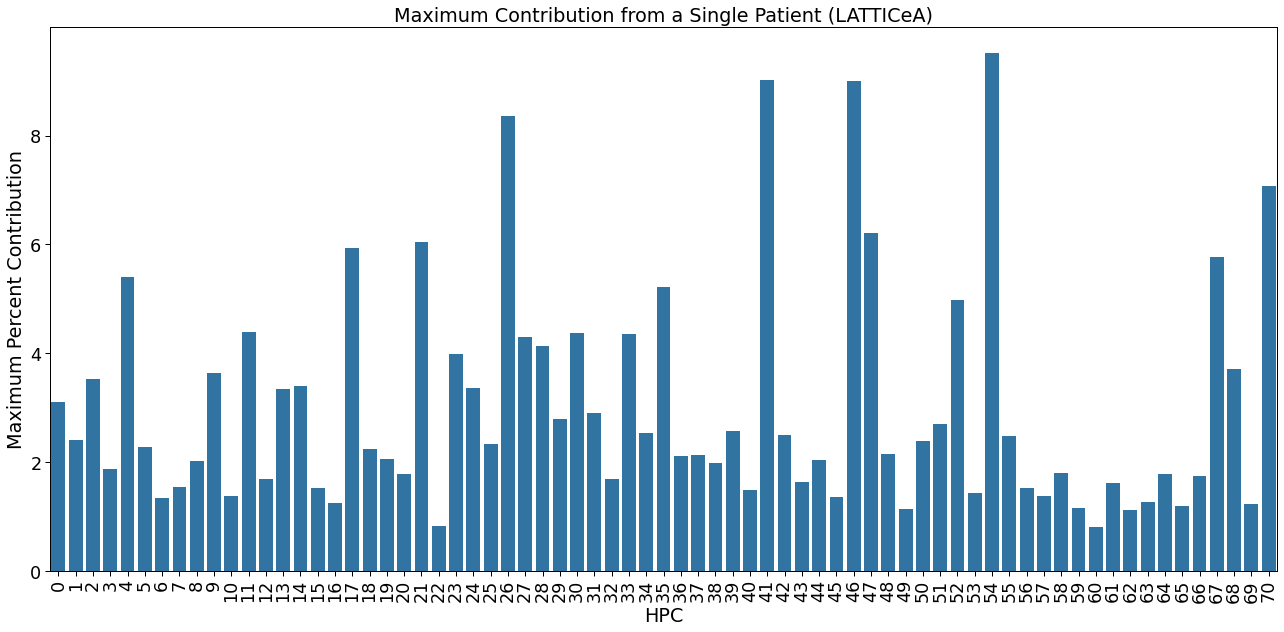

In [75]:
patient_contributions = list()

for cluster in train_df[groupby].dropna().unique():
    cluster_subset = train_df[train_df[groupby] == cluster]
    cluster_size = len(cluster_subset)
    patients, counts = np.unique(cluster_subset['samples'].values, return_counts=True)
    counts_props = counts / cluster_size
    max_idx = np.argmax(counts_props)
    max_val = counts_props[max_idx]
    patient_contributions.append((int(cluster), max_val * 100))

max_patient_df = pd.DataFrame(patient_contributions, columns=['Cluster', 'max_perc'])
max_patient_df = max_patient_df.sort_values(by='Cluster')


fig, ax = plt.subplots(figsize=(22,10))

sns.barplot(max_patient_df, x = 'Cluster', y = 'max_perc', color='tab:blue', ax=ax)
ax.set_ylabel('Maximum Percent Contribution')
ax.set_xlabel('HPC')
ax.set_title('Maximum Contribution from a Single Patient (LATTICeA)')
ax.set_xticks(list(range(71)), labels=list(range(71)), rotation=90)
plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/cluster_qc_frequency/max_single_patient_perc_train_df.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Max Patient (TCGA)

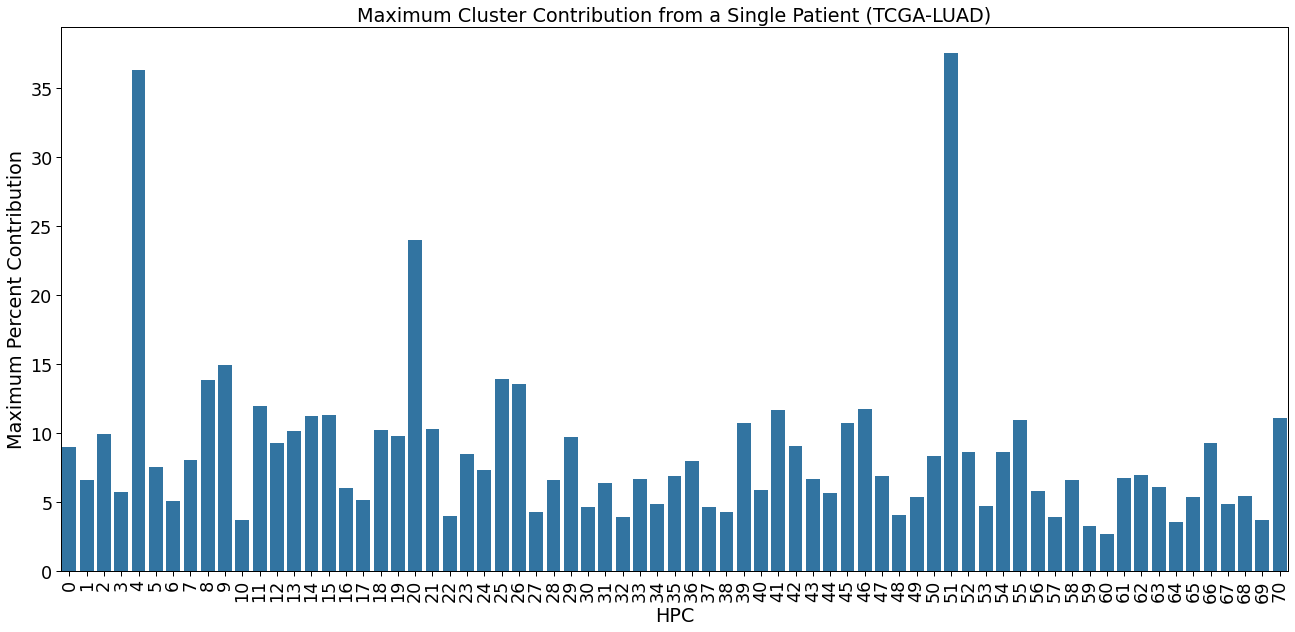

In [76]:
patient_contributions = list()

for cluster in additional_df[groupby].dropna().unique():
    cluster_subset = additional_df[additional_df[groupby] == cluster]
    cluster_size = len(cluster_subset)
    patients, counts = np.unique(cluster_subset['samples'].values, return_counts=True)
    counts_props = counts / cluster_size
    max_idx = np.argmax(counts_props)
    max_val = counts_props[max_idx]
    patient_contributions.append((int(cluster), max_val * 100))

max_patient_df = pd.DataFrame(patient_contributions, columns=['Cluster', 'max_perc'])
max_patient_df = max_patient_df.sort_values(by='Cluster')

fig, ax = plt.subplots(figsize=(22,10))

sns.barplot(max_patient_df, x = 'Cluster', y = 'max_perc', ax=ax)
ax.set_ylabel('Maximum Percent Contribution')
ax.set_xlabel('HPC')
ax.set_title('Maximum Cluster Contribution from a Single Patient (TCGA-LUAD)')
ax.set_xticks(list(range(71)), labels=list(range(71)), rotation=90)

plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/cluster_qc_frequency/max_single_patient_perc_TCGA_df.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Overall cluster frequency (LATTICeA)

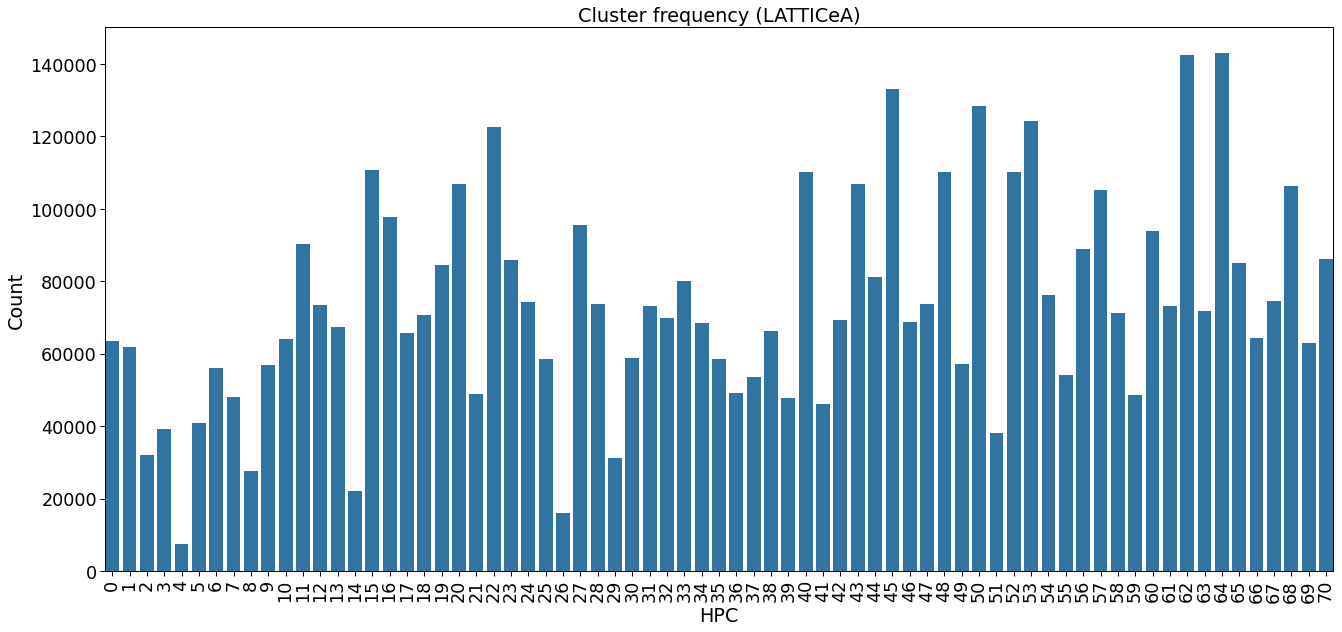

In [71]:
fig, ax = plt.subplots(figsize=(22,10))

sns.countplot(complete_df, x=groupby, color='tab:blue', ax=ax)
ax.set_ylabel('Count')
ax.set_xlabel('HPC')
ax.set_xticks(list(range(71)), labels=list(range(71)), rotation=90)
ax.set_title('Cluster frequency (LATTICeA)')
ax.margins(x=0)
plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/cluster_qc_frequency/cluster_frequency_complete_df.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Overall cluster frequency (LATTICeA - train)

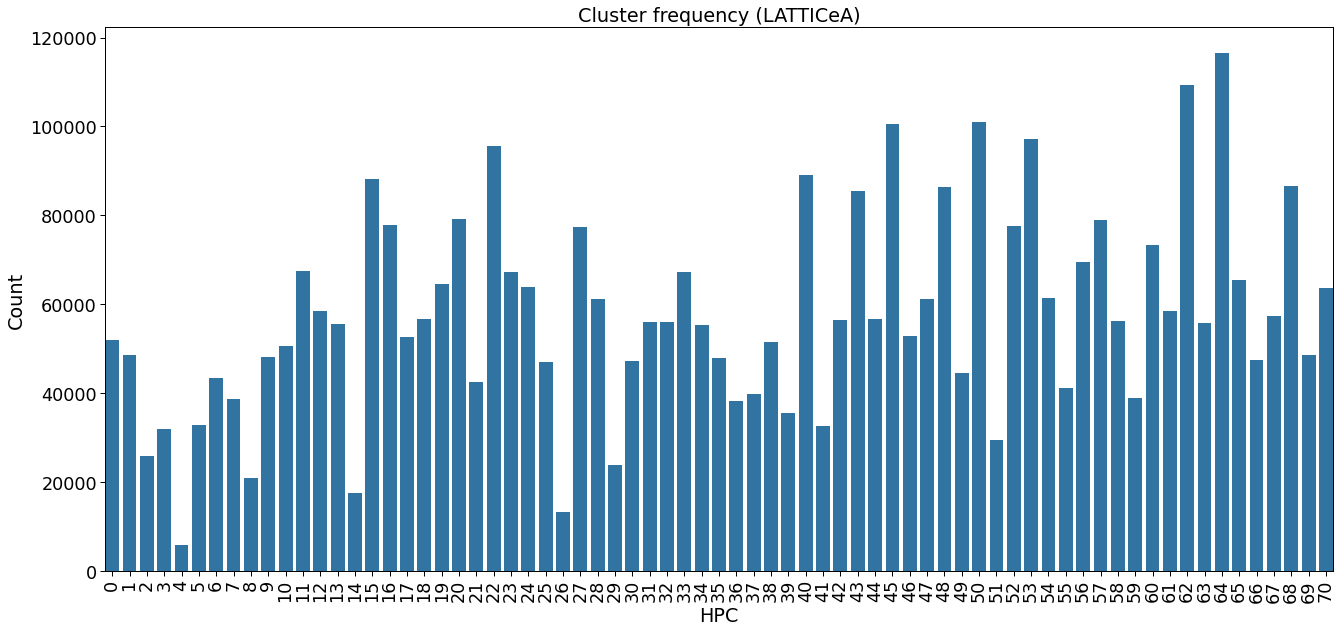

In [72]:
fig, ax = plt.subplots(figsize=(22,10))

sns.countplot(train_df, x=groupby, color='tab:blue', ax=ax)
ax.set_ylabel('Count')
ax.set_xlabel('HPC')
ax.set_xticks(list(range(71)), labels=list(range(71)), rotation=90)
ax.set_title('Cluster frequency (LATTICeA)')
ax.margins(x=0)
plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/cluster_qc_frequency/cluster_frequency_train_df.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Overall cluster frequency (TCGA)

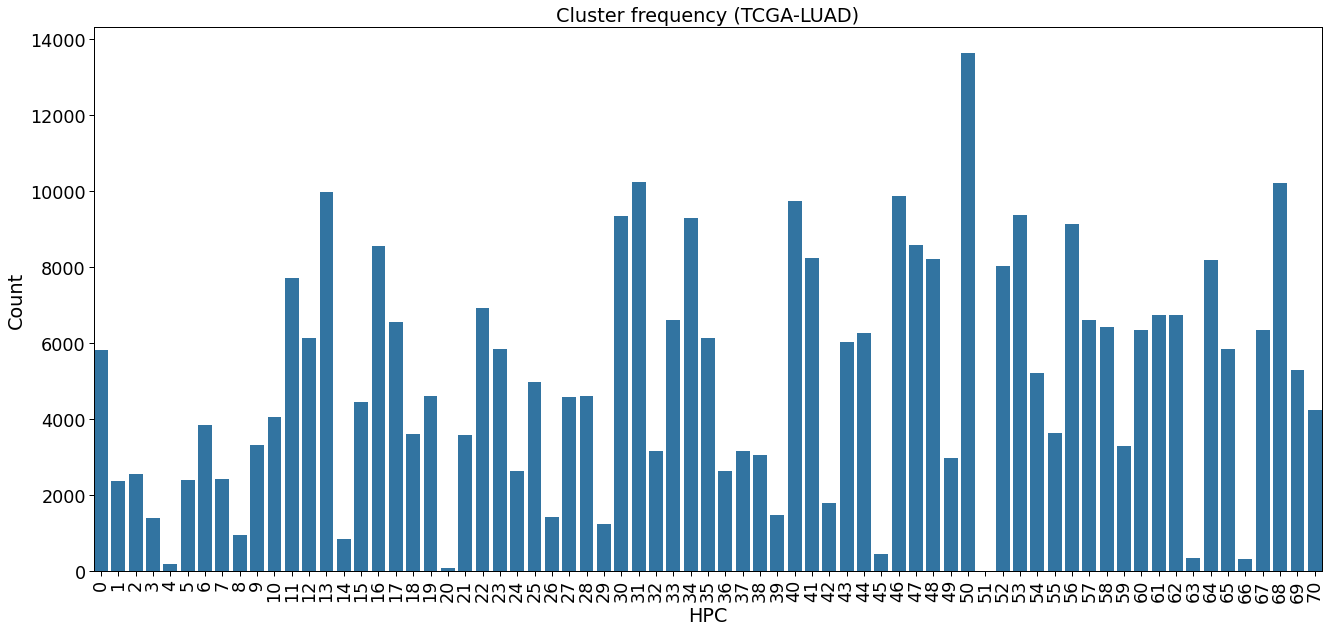

In [73]:
fig, ax = plt.subplots(figsize=(22,10))

sns.countplot(additional_df, x=groupby, color='tab:blue', ax=ax)
ax.set_ylabel('Count')
ax.set_xlabel('HPC')
ax.set_xticks(list(range(71)), labels=list(range(71)), rotation=90)
ax.set_title('Cluster frequency (TCGA-LUAD)')
ax.margins(x=0)
plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/cluster_qc_frequency/cluster_frequency_TCGA_df.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Gini

In [9]:
# The gini coefficient is used in economics to measure wealth inequality
# Calculates the AUC between an equal distribution and another probability distribution 
# ie. prop population on x vs. cum-sum on y; equal distribution is a straight line
# gini = 0 is a perfectly evenly distributed probability distribution; gini = 1 is entirely unequal (100% in one element of the population)

def gini_coefficient(x):
    x = np.array(x, dtype=np.float64)
    if np.any(x < 0):
        x = x - np.min(x)
    
    if np.sum(x) == 0:
        return 0.0
    
    sorted_x = np.sort(x)
    n = x.size    
    index = np.arange(1, n + 1)
    
    # Calculate the Gini coefficient using the formula:
    # G = (2 * sum(i * x_i)) / (n * sum(x)) - (n + 1) / n
    gini = (2 * np.sum(index * sorted_x)) / (n * np.sum(sorted_x)) - (n + 1) / n
    return gini


In [10]:
gini_coefs = list()

for cluster in sorted(train_df[groupby].dropna().unique()):
    cluster_subset = train_df[train_df[groupby] == cluster]
    cluster_size = len(cluster_subset)
    patients, counts = np.unique(cluster_subset['samples'].values, return_counts=True)
    prop_counts = counts / cluster_size
    gini = gini_coefficient(prop_counts)
    gini_coefs.append((cluster, gini))


<Axes: xlabel='cluster', ylabel='gini_coef'>

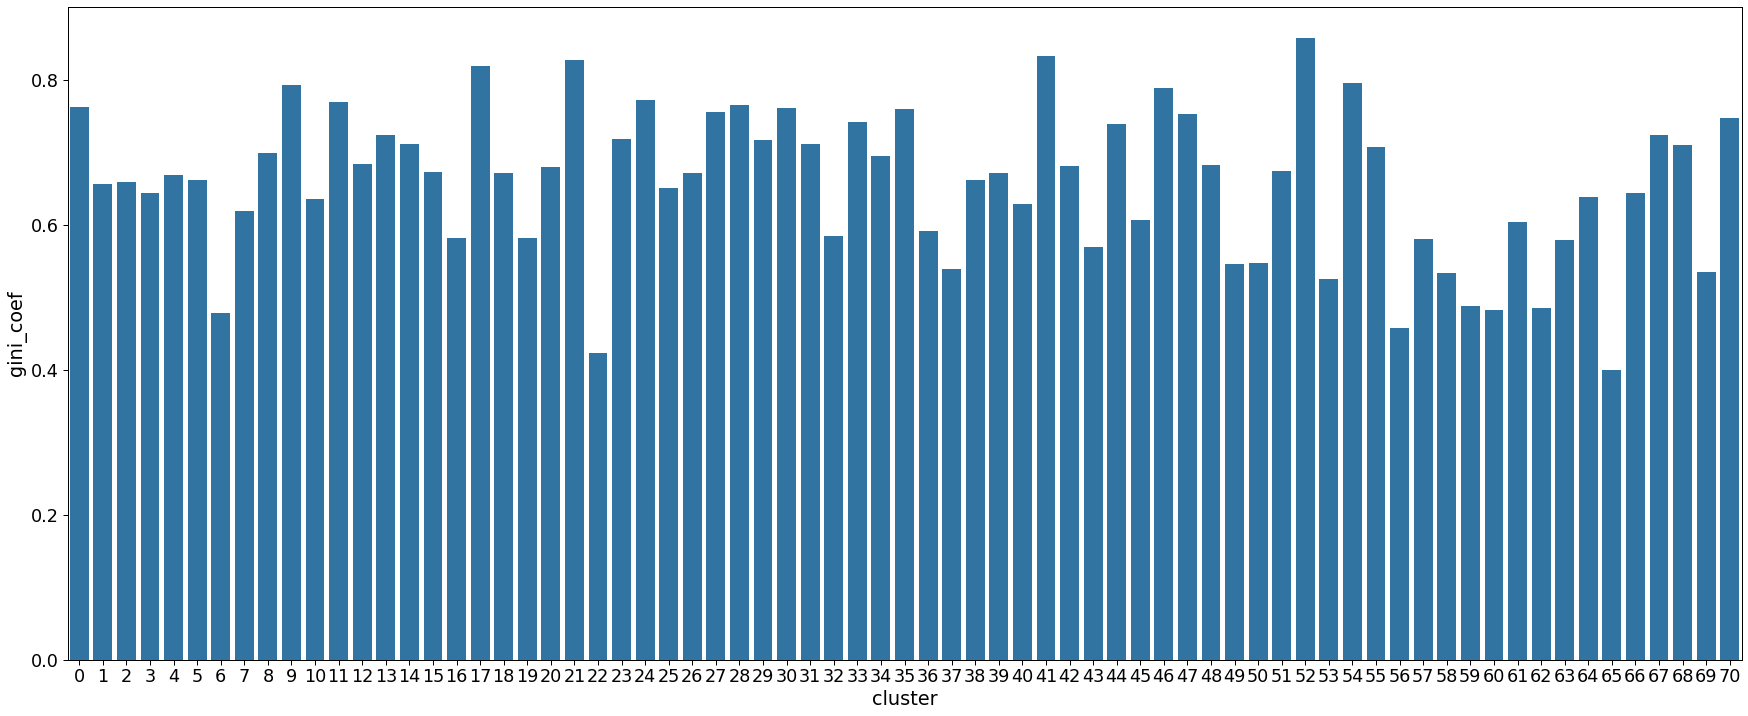

In [11]:
gini_df = pd.DataFrame(gini_coefs, columns=['cluster', 'gini_coef'])
fig, ax = plt.subplots(figsize=(30,12))

sns.barplot(gini_df, x = 'cluster', y = 'gini_coef', ax=ax)